In [1]:
!pip install torch

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out. (read timeout=15)",)': /packages/69/43/380514bd9663f1bf708abeb359b8b48d3fabb1c8e95bb3427a980a064c57/torch-0.4.0-cp36-cp36m-manylinux1_x86_64.whl
    75% |████████████████████████▏       | 364.7MB 39.8MB/s eta 0:00:03

    100% |████████████████████████████████| 484.0MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x7f020000 @  0x7f2e954641c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8


In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# hyper parameters
input_size = 1
output_size = 1
num_epochs = 200
learning_rate = 0.001

In [0]:
# toy dataset
# 15 samples, 1 features
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)

x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)

In [0]:
# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

In [7]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [0]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
# train the model
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.item()))

Epoch [10/200], Loss: 0.2042
Epoch [20/200], Loss: 0.2040
Epoch [30/200], Loss: 0.2038
Epoch [40/200], Loss: 0.2036
Epoch [50/200], Loss: 0.2035
Epoch [60/200], Loss: 0.2033
Epoch [70/200], Loss: 0.2031
Epoch [80/200], Loss: 0.2029
Epoch [90/200], Loss: 0.2027
Epoch [100/200], Loss: 0.2026
Epoch [110/200], Loss: 0.2024
Epoch [120/200], Loss: 0.2022
Epoch [130/200], Loss: 0.2021
Epoch [140/200], Loss: 0.2019
Epoch [150/200], Loss: 0.2017
Epoch [160/200], Loss: 0.2016
Epoch [170/200], Loss: 0.2014
Epoch [180/200], Loss: 0.2012
Epoch [190/200], Loss: 0.2011
Epoch [200/200], Loss: 0.2009


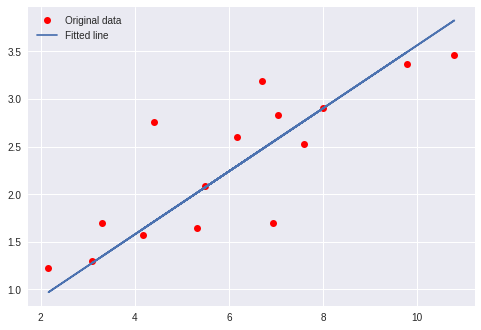

In [13]:
# plot the graph
with torch.no_grad():
    predicted = model(torch.from_numpy(x_train)).numpy()

plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()